In [1]:
import networkx as nx           # networkxモジュールを nx という別名で読み込み
import matplotlib.pyplot as plt # 描画用モジュールの読み込み
# 図の表示用のマジックコマンド 
%matplotlib inline  

In [2]:
G = nx.Graph()     #（無向）グラフ G の生成

D = nx.DiGraph()   #有向グラフ D の生成

In [3]:
G = nx.Graph()
G

In [4]:
G.add_node("Tokyo")
G.add_edge(1,2)


In [5]:
print(G.nodes)
print(G.edges)

['Tokyo', 1, 2]
[(1, 2)]


In [6]:
from pyvis.network import Network

## 問題（グラフの生成と描画）

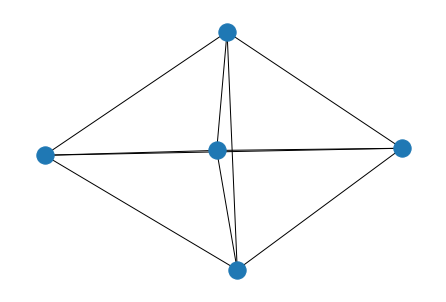

In [7]:
G = nx.Graph()       # グラフのインスタンスを生成
for i in range(5):
    for j in range(5):
        if i<j: #無向グラフなので，iより大きいjの場合だけ枝を生成
            G.add_edge(i, j)
nx.draw(G)   

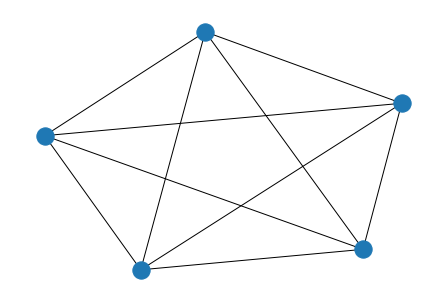

In [8]:
G = nx.complete_graph(5) #完全グラフを生成するcomplete_graph関数を利用
nx.draw(G)


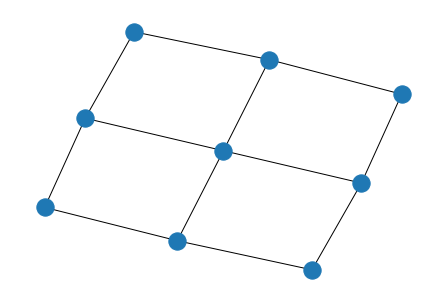

In [9]:
G = nx.grid_2d_graph(3,3)
nx.draw(G)

## 問題（3*3の格子グラフの枝の重みをランダムに設定）

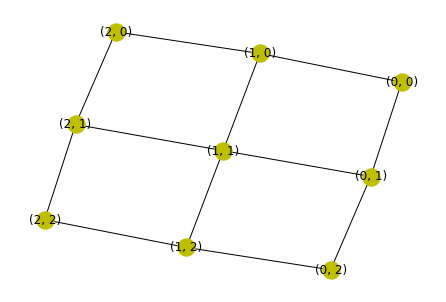

In [10]:
G = nx.grid_2d_graph(3,3)
nx.draw(G, node_color="y",with_labels=True)

In [11]:
import random

In [12]:
for e in G.edges():
    r = random.randint(10,500)
    print("枝", e, "のweightは", r)

枝 ((0, 0), (1, 0)) のweightは 121
枝 ((0, 0), (0, 1)) のweightは 117
枝 ((0, 1), (1, 1)) のweightは 17
枝 ((0, 1), (0, 2)) のweightは 221
枝 ((0, 2), (1, 2)) のweightは 87
枝 ((1, 0), (2, 0)) のweightは 27
枝 ((1, 0), (1, 1)) のweightは 362
枝 ((1, 1), (2, 1)) のweightは 100
枝 ((1, 1), (1, 2)) のweightは 232
枝 ((1, 2), (2, 2)) のweightは 403
枝 ((2, 0), (2, 1)) のweightは 29
枝 ((2, 1), (2, 2)) のweightは 62


## 問題（描画の引数）

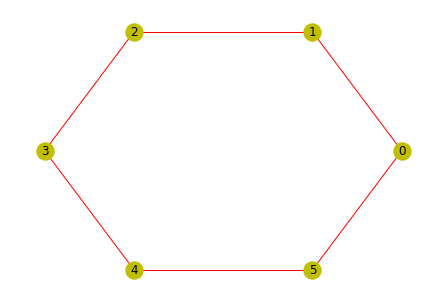

In [13]:
G=nx.cycle_graph(6)
pos=nx.kamada_kawai_layout(G)
nx.draw(G,pos=pos,edge_color="r",node_color="y", with_labels=True)

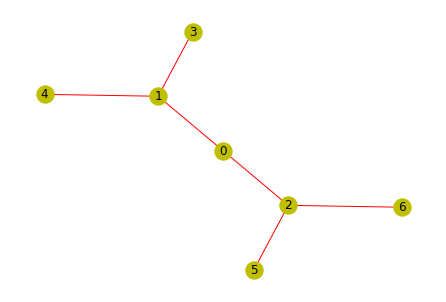

In [14]:
G=nx.balanced_tree(2,2)
pos=nx.kamada_kawai_layout(G)
nx.draw(G,pos=pos,edge_color="r",node_color="y", with_labels=True)

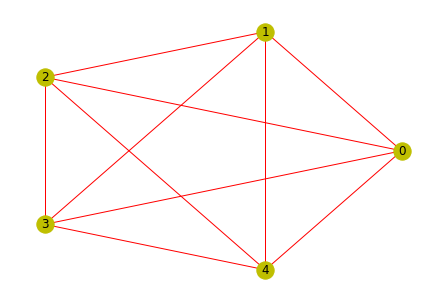

In [15]:
G=nx.complete_graph(5)
pos=nx.kamada_kawai_layout(G)
nx.draw(G,pos=pos,edge_color="r",node_color="y", with_labels=True)

## 問題（グラフに対する基本操作）

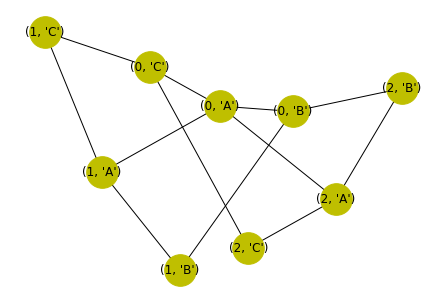

In [16]:
G = nx.Graph()
H = nx.Graph()
G.add_edges_from( [(0,1),(0,2)] )
H.add_edges_from([ ('A','B'),('A','C')] )
Product = nx.cartesian_product(G,H)
nx.draw(Product, with_labels=True, node_size=1000, node_color="y")

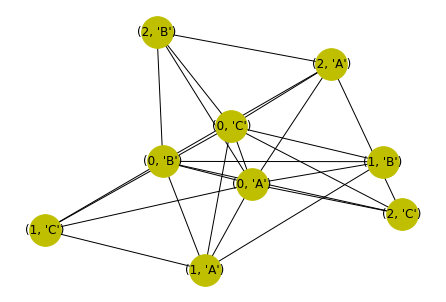

In [17]:
#辞書的積
Product = nx.lexicographic_product(G, H)
nx.draw(Product, with_labels=True, node_size=1000, node_color="y")

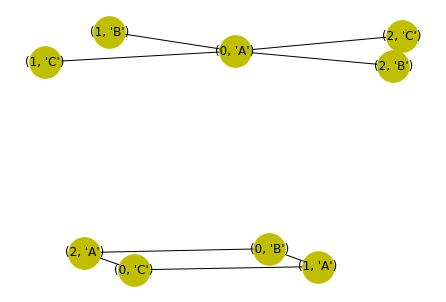

In [18]:
#テンソル積
Product = nx.tensor_product(G, H)
nx.draw(Product, with_labels=True, node_size=1000, node_color="y")

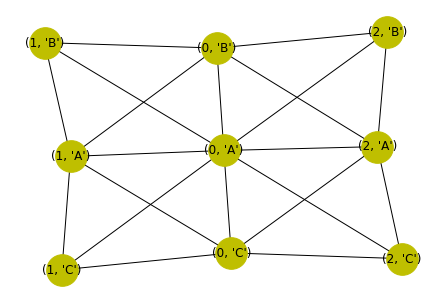

In [19]:
#強積
Product = nx.strong_product(G, H)
nx.draw(Product, with_labels=True, node_size=1000, node_color="y")

## 問題）（マッチングとEuler閉路）

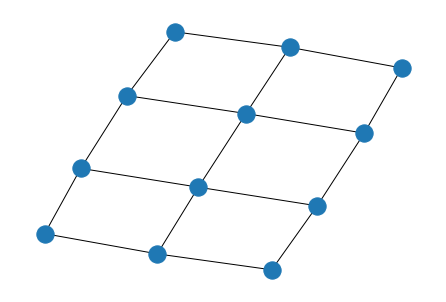

In [20]:
G = nx.grid_2d_graph(3,4)
nx.draw(G)

In [21]:
NewG = nx.eulerize(G)
print ("Eulerian?", nx.is_eulerian(NewG))
D = nx.MultiDiGraph()
for e in nx.eulerian_circuit(NewG):
    D.add_edge(e[0],e[1])

Eulerian? True


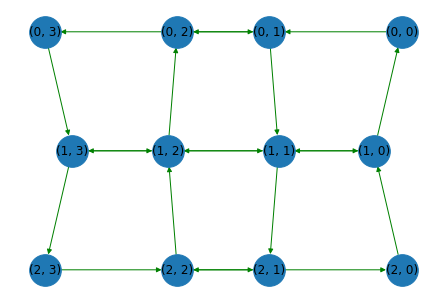

In [22]:
nx.draw_spectral(D,with_labels=True, node_size=1000,edge_color="g",width=1)

In [23]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt

問題（最小木）

1

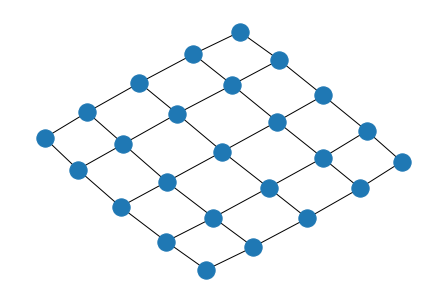

In [25]:
G = nx.grid_2d_graph(5,5)
nx.draw(G)

In [33]:
m, n = 5, 5
lb, ub = 1, 20
G = nx.grid_2d_graph(m, n)
for (i,j) in G.edges():
    G[i][j]["weight"] = 1
pos ={(i,j):(i,j) for (i,j) in G.nodes() } 

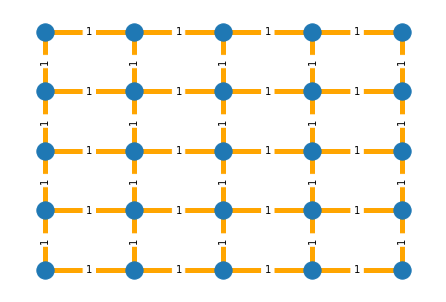

In [35]:
plt.figure()
nx.draw(G, pos=pos, node_size=100)
edge_labels ={}
for (i,j) in G.edges():
    edge_labels[i,j] = f"{ G[i][j]['weight'] }"
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G, pos=pos, width=5, edge_color ="orange")
plt.show()

2

In [36]:
import random
m, n = 5, 5
lb, ub = 1, 20
G = nx.grid_2d_graph(m, n)
for (i,j) in G.edges():
    G[i][j]["weight"] = random.randint(lb, ub)
pos ={(i,j):(i,j) for (i,j) in G.nodes() } 

In [37]:
edges = list(nx.minimum_spanning_edges(G))

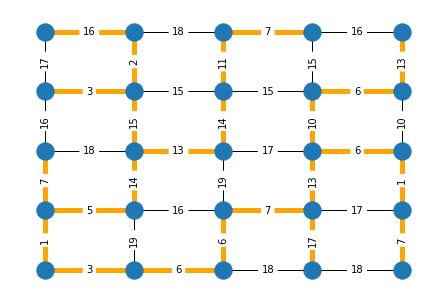

In [38]:
plt.figure()
nx.draw(G, pos=pos, node_size=100)
edge_labels ={}
for (i,j) in G.edges():
    edge_labels[i,j] = f"{ G[i][j]['weight'] }"
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G, pos=pos, width=5, edgelist= edges, edge_color ="orange")
plt.show()

3

In [42]:
weight =[ ]
for (i,j,w) in edges:
    weight.append( (w["weight"], i,j) )
weight.sort(reverse=True)
print(weight)
print("max distance=", weight[4-1][0])

[(17, (3, 0), (3, 1)), (16, (0, 4), (1, 4)), (15, (1, 2), (1, 3)), (14, (2, 2), (2, 3)), (14, (1, 1), (1, 2)), (13, (4, 3), (4, 4)), (13, (3, 1), (3, 2)), (13, (1, 2), (2, 2)), (11, (2, 3), (2, 4)), (10, (3, 2), (3, 3)), (7, (4, 0), (4, 1)), (7, (2, 4), (3, 4)), (7, (2, 1), (3, 1)), (7, (0, 1), (0, 2)), (6, (3, 3), (4, 3)), (6, (3, 2), (4, 2)), (6, (2, 0), (2, 1)), (6, (1, 0), (2, 0)), (5, (0, 1), (1, 1)), (3, (0, 3), (1, 3)), (3, (0, 0), (1, 0)), (2, (1, 3), (1, 4)), (1, (4, 1), (4, 2)), (1, (0, 0), (0, 1))]
max distance= 14


In [43]:
G1 = nx.Graph()
for (w,i,j) in weight[4:]: 
    G1.add_edge(i,j)

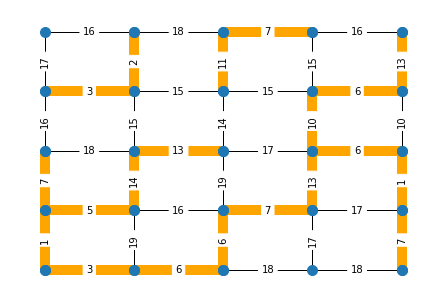

In [44]:
nx.draw(G, pos=pos, node_size=100)
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G1, pos=pos, node_size=100, width=10, edge_color="orange")

最短路

問題
自宅から大学（越中島）までの最短時間と最小費用のパスを求めるためのネットワークを作成し，最短時間パスと最小費用パスを求めよ． ただし大学から徒歩圏の学生は，自宅もしくは親戚の家からのパスを求めよ．

In [56]:
G = nx.Graph()
G.add_edge('品川','越中島', weight=40, cost=170)
G.add_edge('品川', '新木場', weight=15, cost=330)
G.add_edge('新木場', '越中島', weight=5, cost=160)

path = nx.dijkstra_path(G,'品川','越中島')
print('最短時間パス', path)

path = nx.dijkstra_path(G,'品川','越中島',weight='cost')
print('最小費用パス', path )

最短時間パス ['品川', '新木場', '越中島']
最小費用パス ['品川', '越中島']


問題
3*3 の格子グラフを生成するプログラムを作成し，枝の重みをランダムに設定した上で， 左上の点から右下の点までの最短路を求め，最短路を異なる色で描画せよ．

In [71]:
import random
m, n = 3, 3 
lb, ub = (0, 20)
G = nx.grid_2d_graph(m, n)
for (i,j) in G.edges():
    G[i][j]["weight"] = random.randint(lb, ub)
pos ={(i,j):(i,j) for (i,j) in G.nodes() }

In [72]:
edges = list(nx.minimum_spanning_edges(G))

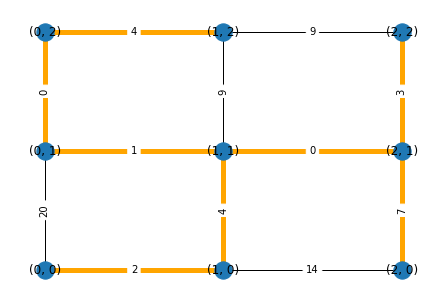

In [84]:
plt.figure()
nx.draw(G, pos=pos, node_size=100)
edge_labels ={}
for (i,j) in G.edges():
    edge_labels[i,j] = f"{ G[i][j]['weight'] }"
nx.draw_networkx_edge_labels(G,pos,edge_labels=edge_labels)
nx.draw(G, pos=pos, with_labels=True, width=5,  edgelist= edges, edge_color ="orange")
plt.show()

In [93]:
G.nodes()

NodeView(((0, 0), (0, 1), (0, 2), (1, 0), (1, 1), (1, 2), (2, 0), (2, 1), (2, 2)))

In [94]:
for path in nx.all_simple_paths(G, source=(0,2), target=(2,0)):
    print(path)

[(0, 2), (1, 2), (2, 2), (2, 1), (1, 1), (0, 1), (0, 0), (1, 0), (2, 0)]
[(0, 2), (1, 2), (2, 2), (2, 1), (1, 1), (1, 0), (2, 0)]
[(0, 2), (1, 2), (2, 2), (2, 1), (2, 0)]
[(0, 2), (1, 2), (1, 1), (0, 1), (0, 0), (1, 0), (2, 0)]
[(0, 2), (1, 2), (1, 1), (2, 1), (2, 0)]
[(0, 2), (1, 2), (1, 1), (1, 0), (2, 0)]
[(0, 2), (0, 1), (1, 1), (2, 1), (2, 0)]
[(0, 2), (0, 1), (1, 1), (1, 0), (2, 0)]
[(0, 2), (0, 1), (1, 1), (1, 2), (2, 2), (2, 1), (2, 0)]
[(0, 2), (0, 1), (0, 0), (1, 0), (2, 0)]
[(0, 2), (0, 1), (0, 0), (1, 0), (1, 1), (2, 1), (2, 0)]
[(0, 2), (0, 1), (0, 0), (1, 0), (1, 1), (1, 2), (2, 2), (2, 1), (2, 0)]


問題 (PERT)
あなたは航空機会社のコンサルタントだ．あなたの仕事は，着陸した航空機をなるべく早く離陸させるためのスケジュールをたてることだ． 航空機は，再び離陸する前に幾つかの作業をこなさなければならない． まず，乗客と荷物を降ろし，次に機内の掃除をし，最後に新しい乗客を搭乗させ，新しい荷物を積み込む． 当然のことであるが， 乗客を降ろす前に掃除はできず，掃除をした後でないと新しい乗客を入れることはできず， 荷物をすべて降ろし終わった後でないと，新しい荷物は積み込むことができない． また，この航空機会社では， 乗客用のゲートの都合で，荷物を降ろし終わった後でないと新しい乗客を搭乗させることができないのだ．

作業時間は，乗客降ろし 1313 分，荷物降ろし 2525 分，機内清掃 1515 分，新しい乗客の搭乗 2727 分， 新しい荷物積み込み 2222 分とする． さて，最短で何分で離陸できるだろうか？

ヒント： 最短離陸時間を出すにはグラフの最長路を求める必要がある． 枝の重みを負にして最短路を解けば良い． 枝の重みが負なので， Dijkstra法でなくBellman-Ford法を使う．

フロー問題